In [13]:
from _common.database_communicator.db_connector import DBConnector
import pandas as pd
from ml_model.src.data.data_preprocessing import DataPreprocessor
from ml_model.src.models.train_model import XGBoostRegressor
from sklearn.model_selection import train_test_split
from _common.misc.variables import CATEGORICAL_FEATS, NUMERIC_FEATS, TARGET_COL, FEAT_COLS

In [14]:
preprocessor = DataPreprocessor()

preprocessor.run_preprocessing_pipeline()
df = preprocessor.get()

In [15]:
# df = df[df['floor'] != 100]

In [16]:
# df['year_built'] = df['year_built'].astype('float64')
# df['floor'] = df['floor'].fillna(1)

In [17]:
df.head()

,status,size,property_type,rooms,floor,year_built,property_condition,location,price
0,pierwotny,51.00,blok,3.0,NaN,2023.0,do wykończenia,Starołęka Mała,552520.0
1,wtórny,59.00,blok,3.0,NaN,NaN,NaN,Naramowice,649000.0
2,pierwotny,41.92,apartamentowiec,2.0,5.0,2023.0,NaN,Łacina,679000.0
3,wtórny,43.65,kamienica,2.0,3.0,1900.0,do zamieszkania,Stare Miasto,679000.0
4,pierwotny,49.60,blok,3.0,NaN,2023.0,do wykończenia,Starołęka Mała,533700.0


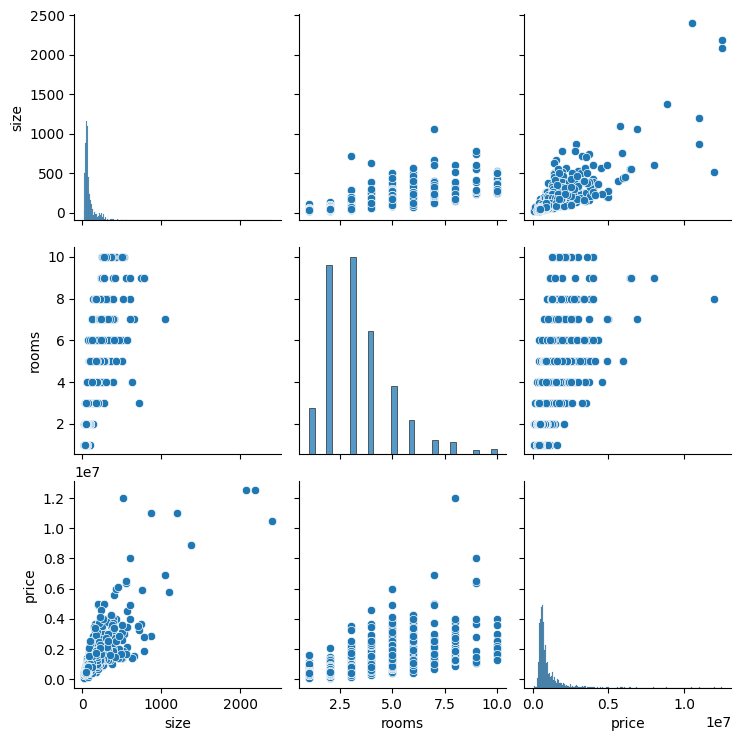

In [18]:
import seaborn as sns

sns.pairplot(df)

In [19]:
X_train, X_test, y_train, y_test = preprocessor.train_test_split()

In [20]:
X_train.head()

,status,size,property_type,rooms,floor,year_built,property_condition,location
2995,wtórny,187.00,NaN,4.0,NaN,NaN,do zamieszkania,Stare Miasto
263,wtórny,59.00,blok,2.0,0.0,2001.0,do zamieszkania,Grunwald
1938,pierwotny,48.59,blok,3.0,3.0,2025.0,do wykończenia,Naramowice
1686,pierwotny,75.53,NaN,4.0,1.0,2025.0,do wykończenia,Jeżyce
2117,wtórny,365.00,NaN,NaN,NaN,NaN,do zamieszkania,Piątkowo


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[CV] END colsample_bytree=1.0, eta=0.2, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=5, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, eta=0.2, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=5, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, eta=0.2, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=5, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, eta=0.3, gamma=0, learning_rate=0.3, max_depth=25, min_child_weight=10, n_estimators=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, eta=0.3, gamma=0, learning_rate=0.3, max_depth=25, min_child_weight=10, n_estimators=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=0.

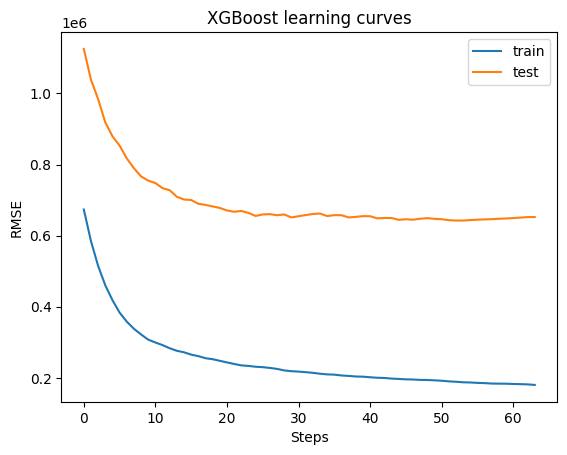

MAE: 211491.31785326087
RMSE: 642511.8451154451
R2: 0.7151031683635556


In [21]:
xgb_regressor = XGBoostRegressor()
xgb_regressor.random_search_cv(
    X_train, y_train, n_iter=500, random_state=30, verbose=2
)
xgb_regressor.train(X_train, y_train, X_test, y_test, verbose=False)
xgb_regressor.plot_learning_curves()
xgb_regressor.evaluate(X_test, y_test)

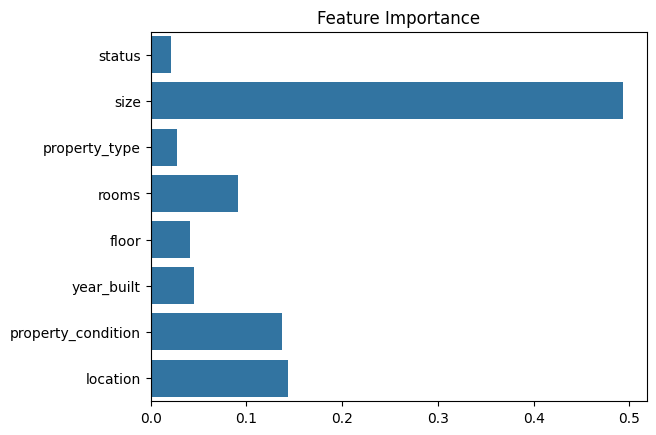

In [22]:
from turtle import title
import matplotlib.pyplot as plt
feature_importance = xgb_regressor.feature_importances_
sns.barplot(x=feature_importance, y=FEAT_COLS)
plt.title("Feature Importance")
plt.show()

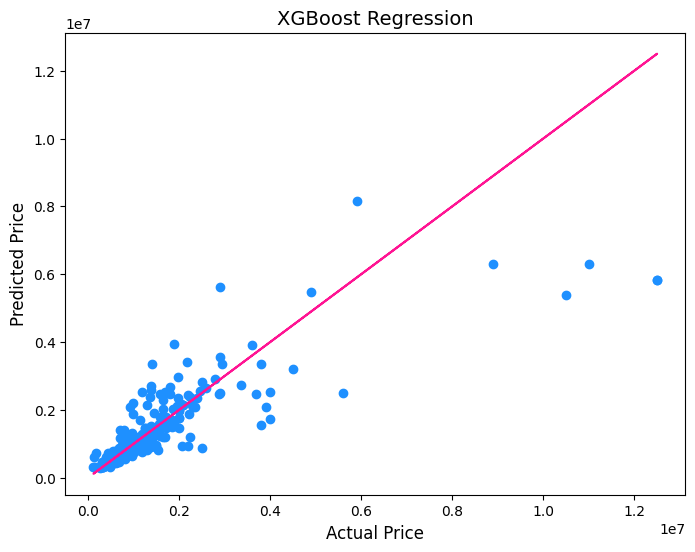

In [23]:

prediction_xgbr = xgb_regressor.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Price',fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
plt.title('XGBoost Regression',fontsize=14)
plt.show()

In [24]:
cor=df.corr()

ValueError: could not convert string to float: 'pierwotny'